In [ ]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

# Importing required libraries

In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading Boston Housing dataset from sklearn library and creating a dataframe

In [81]:
boston = fetch_openml(name="boston", version=1)
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


# Cheking for null or na values

In [64]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [65]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [66]:
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Basic statistics of boston dataset

In [67]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


# Splitting the dataset in train and test.
- 20% data set is considered for training 

In [70]:
# Input Data
x = df.iloc[ : , [1,2,3,4,5,6,7,8,9]].values
 
# Output Data
y = df.iloc[: , -1]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,
                                                    random_state = 0)

# Using LinearRegression() in sklearn to make a linear  regression predictor

In [71]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
 
# predicting the test set results
y_pred = regressor.predict(xtest)
y_pred

array([24.34788421, 17.91789699, 26.48092866, 10.88469012, 21.07084659,
       19.9100098 , 15.95583626, 21.80277721, 17.87876041, 23.92064614,
       14.7891381 , 20.67920749, 16.75304842,  6.14911137, 35.22705064,
       31.55340333, 17.57707912, 33.72484653, 29.15699466, 22.69237842,
       24.85026762, 17.74431935, 22.91997541, 30.50453429, 21.13711963,
        1.20172972, 19.586051  , 15.54047364, 37.51381985, 20.39038676,
       16.51511689, 14.91785162, 17.992735  , 21.60282835, 25.93611796,
       17.28753489, 15.20931085, 19.73857941, 18.69237101, 16.49971428,
       22.96749442, 21.88304893, 21.1430122 , 11.22018502, 21.51736789,
       23.44531822, 17.02456235, 22.16735519, 10.45627369, 26.37170325,
       23.13698556, 21.35514272, 21.88923592, 34.94735773, 16.05222444,
       20.7457567 , 20.8519753 , 15.9782647 , 14.65826861, 23.80539556,
       17.41996539, 22.20879654, 31.51371367, 29.07732013, 14.94756388,
       29.50815016, 18.59059484, 19.41864653, 22.1157822 , 23.64

# Calculating Mean Sqaured Error (MSE) and Mean Absolute Error(MAE)

In [72]:
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  42.79192957380572
Mean Absolute Error :  4.041417772419189


# Plotting the scatter plot of predicted values and ideal line

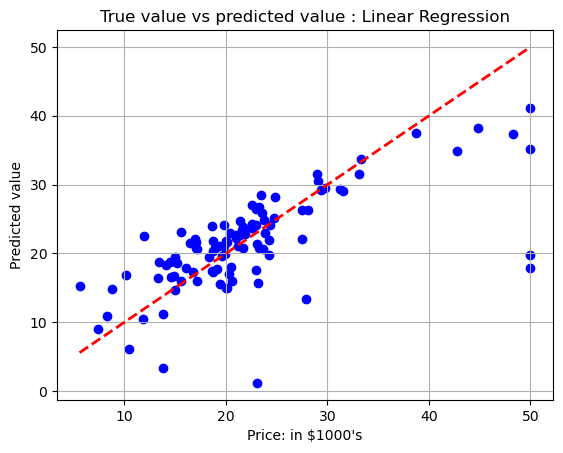

In [80]:
import matplotlib.pyplot as plt

plt.scatter(ytest, y_pred, c = 'blue')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")

plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=2)
plt.grid(True)
plt.show()
